In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns


C:\Users\robin\AppData\Local\Temp\ipykernel_25520\4005835899.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# create a dataframe

students = pd.read_csv("StudentPerformanceFactors_Cleaned.csv")


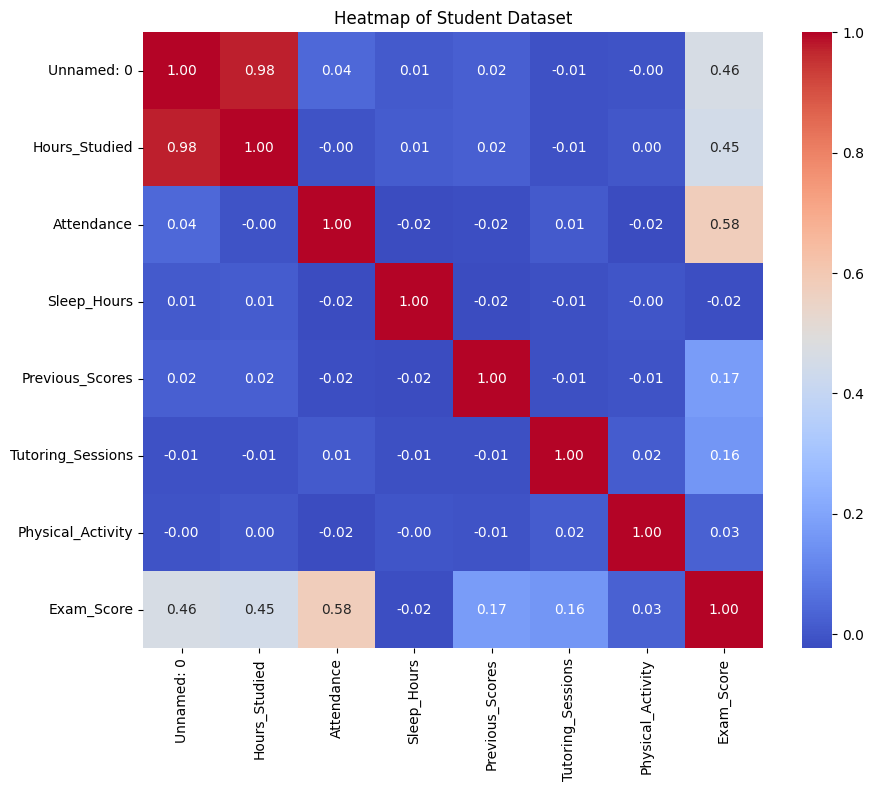

In [4]:
numeric_df = students.select_dtypes(include=['float64', 'int64'])
# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Student Dataset')
plt.show()

On peut voir que les différentes colonnes les plus en corrélations sont les exam scores avec attendance  et les exam scores avec study hours

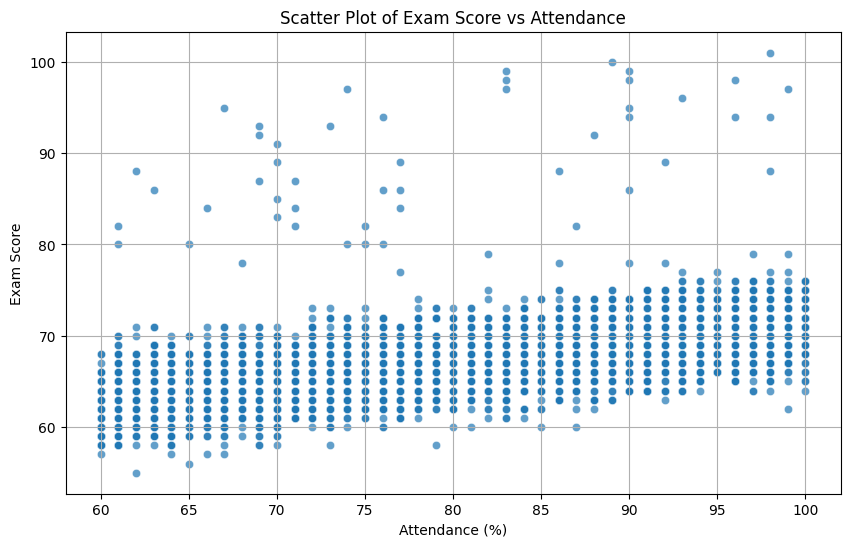

In [6]:
# Assuming 'exam_score' and 'attendance' are the column names in your dataset
plt.figure(figsize=(10, 6))
sns.scatterplot(data=students, x='Attendance', y='Exam_Score', alpha=0.7)
plt.title('Scatter Plot of Exam Score vs Attendance')
plt.xlabel('Attendance (%)')  # Adjust the label according to your data
plt.ylabel('Exam Score')       # Adjust the label according to your data
plt.grid(True)
plt.show()